In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
import statistics as st
import arviz as az
import bambi as bmb
import pymc as pm
from pymc import HalfNormal, Model, Normal, sample
import networkx as nx
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=Warning)

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 12345
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

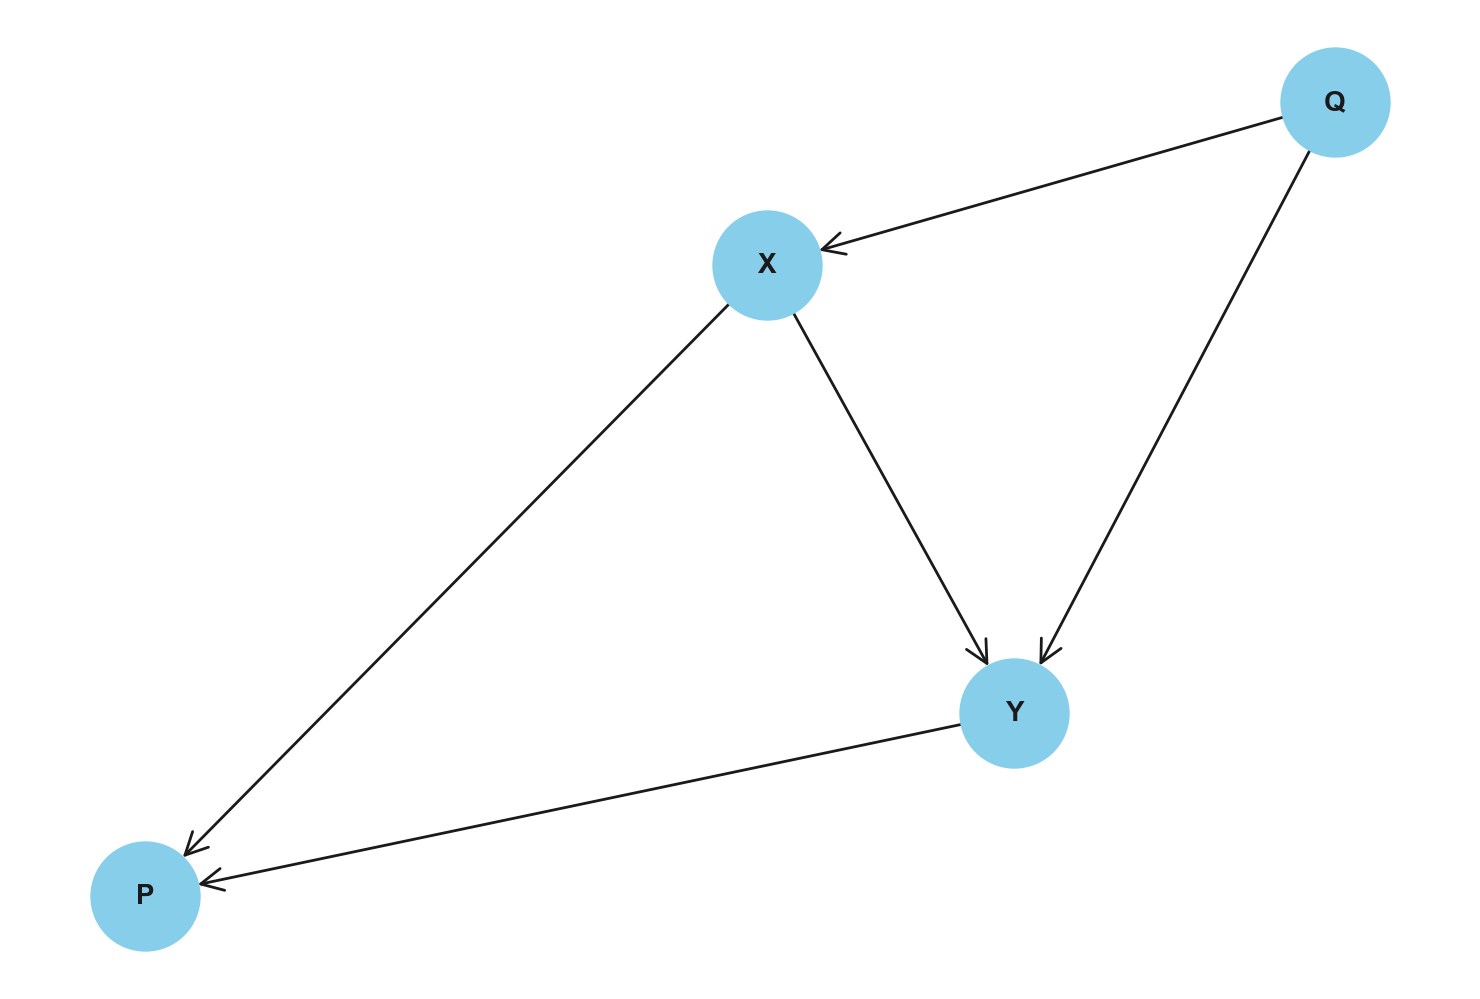

In [3]:
graph = nx.DiGraph()
#graph.add_edges_from([("root", "a"), ("a", "b"), ("a", "e"), ("b", "c"), ("b", "d"), ("d", "e")])
graph.add_edges_from([("X", "Y"), ("X", "P"), ("Y", "P"), ("Q", "X"), ("Q", "Y")])

# Draw the graph
pos = nx.spring_layout(graph, seed=42)  # Position nodes using spring layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=1500, node_color="skyblue", font_size=10, font_weight="bold", arrowsize=20, arrowstyle="->")
plt.show()

In [4]:
N = 5_000
Q = rng.normal(size=N)
X = rng.normal(loc=0.14*Q, scale=0.4, size=N)
Y = rng.normal(loc=0.7*X + 0.11*Q, scale=0.24, size=N)
P = rng.normal(loc=0.43*X + 0.21*Y, scale=0.22, size=N)
df = pd.DataFrame({"Q": Q, "X": X, "Y": Y, "P": P})

df.head()

,Q,X,Y,P
0,-1.423825,-0.421305,-0.498653,0.039523
1,1.263728,0.518683,0.576752,0.059713
2,-0.870662,0.354544,0.157422,0.367875
3,-0.259173,0.135539,0.307791,0.016444
4,-0.075343,-0.048982,0.114759,0.134512


In [5]:
model = bmb.Model("Y ~ X", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.495038


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  35%|██████████████████▌                                  | 700/2000 [00:01<00:00, 6978.29it/s]

Running chain 2:  40%|█████████████████████▏                               | 800/2000 [00:01<00:00, 7786.95it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4868.37it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5643.51it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:01<00:00, 7747.58it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 8398.35it/s]

Running chain 3:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:01<00:00, 7876.11it/s]

Running chain 2:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 8558.44it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1210.26it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1211.24it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1212.10it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1213.00it/s]


Sampling time = 0:00:01.878013


Transforming variables...


Transformation time = 0:00:00.077756


Computing Log Likelihood...


Log Likelihood time = 0:00:00.309270


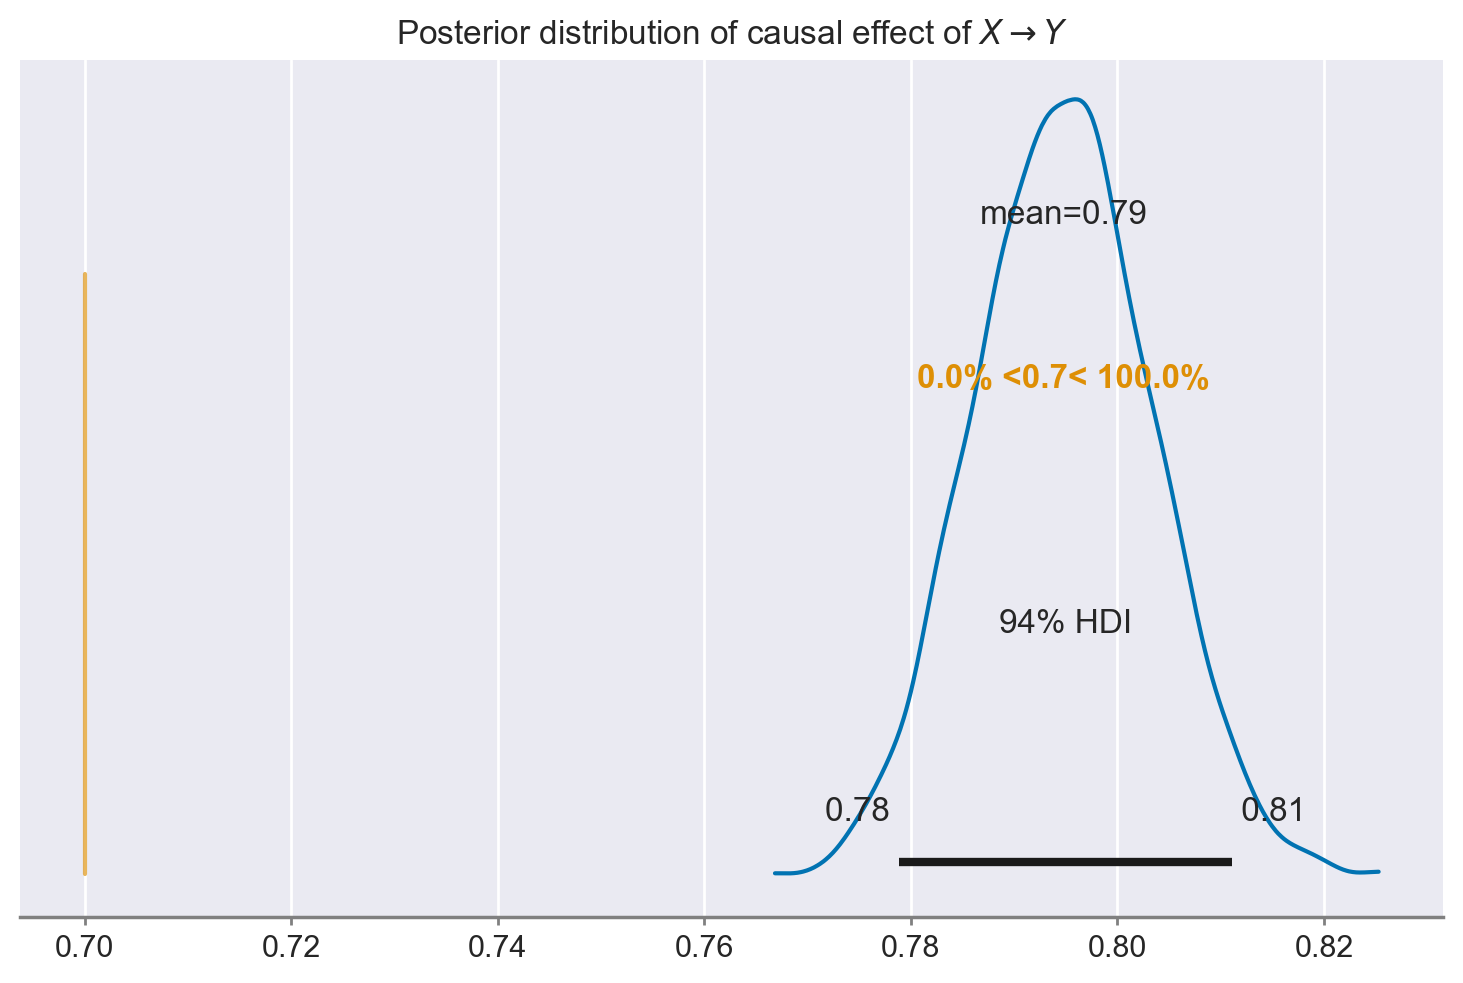

In [6]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [7]:
model = bmb.Model("Y ~ Q + X + P", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.840874


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:01<00:00, 3718.00it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4380.12it/s]

Running chain 0:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4237.75it/s]

Running chain 3:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4236.61it/s]

Running chain 2:  55%|████████████████████████████▌                       | 1100/2000 [00:01<00:00, 5290.19it/s]

Running chain 1:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5549.35it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5458.52it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 5395.43it/s]

Running chain 2:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:01<00:00, 5589.46it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:01<00:00, 5526.67it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 5784.19it/s]

Running chain 0:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:01<00:00, 5787.97it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1019.30it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1019.92it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1020.68it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1021.26it/s]


Sampling time = 0:00:02.047825


Transforming variables...


Transformation time = 0:00:00.048516


Computing Log Likelihood...


Log Likelihood time = 0:00:00.260713


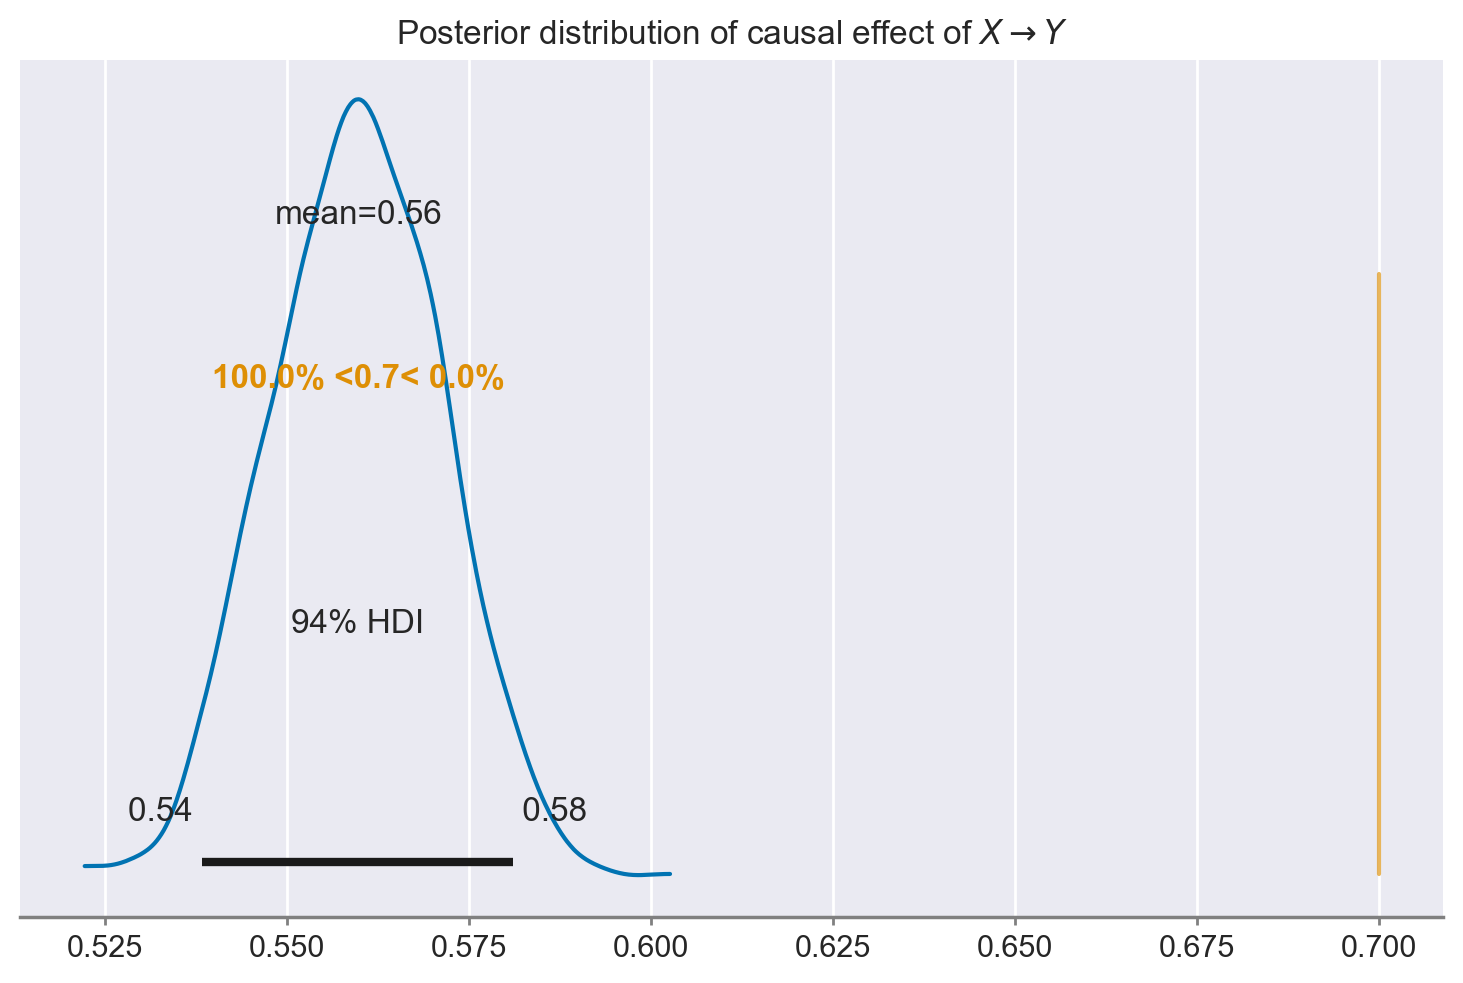

In [8]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [9]:
model = bmb.Model("Y ~ X + Q", df)
results = model.fit(method="nuts_numpyro", idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:00.640403


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4966.68it/s]

Running chain 1:  25%|█████████████▎                                       | 500/2000 [00:01<00:00, 4766.62it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5414.28it/s]

Running chain 2:  30%|███████████████▉                                     | 600/2000 [00:01<00:00, 5383.69it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:01<00:00, 6085.94it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6122.94it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:01<00:00, 6152.55it/s]

Running chain 0:  70%|████████████████████████████████████▍               | 1400/2000 [00:01<00:00, 6498.92it/s]

Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6551.10it/s]

Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6472.26it/s]

Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 6328.92it/s]

Running chain 0: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1192.46it/s]


Running chain 1: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1193.07it/s]


Running chain 2: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1194.04it/s]


Running chain 3: 100%|████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1195.11it/s]


Sampling time = 0:00:01.760866


Transforming variables...


Transformation time = 0:00:00.049024


Computing Log Likelihood...


Log Likelihood time = 0:00:00.271536


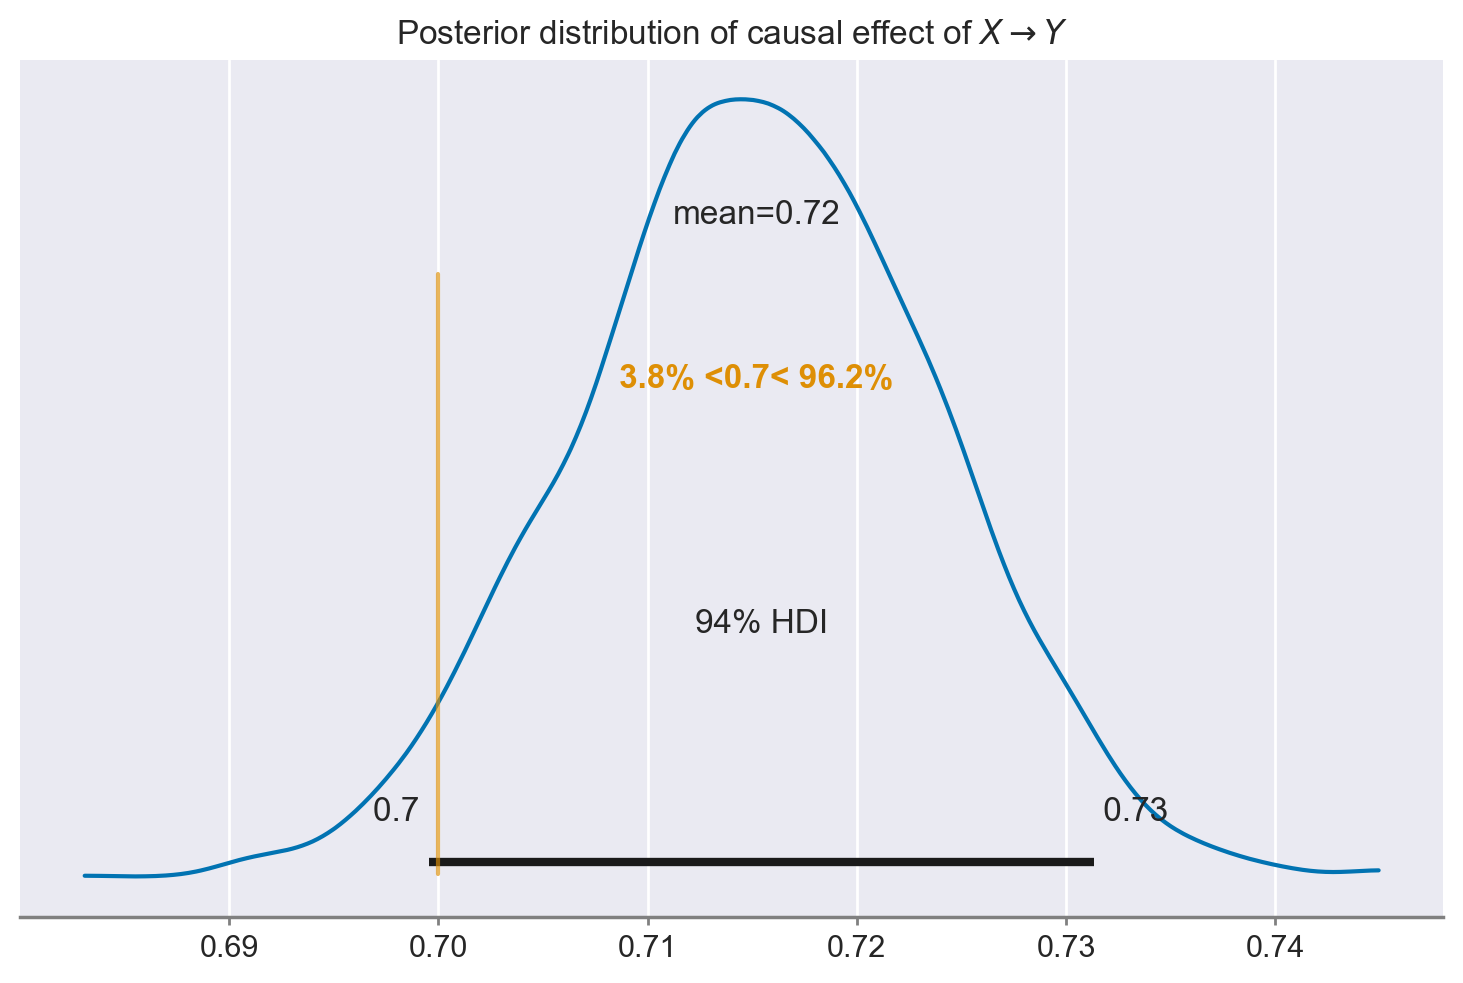

In [10]:
ax = az.plot_posterior(results.posterior["X"], ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

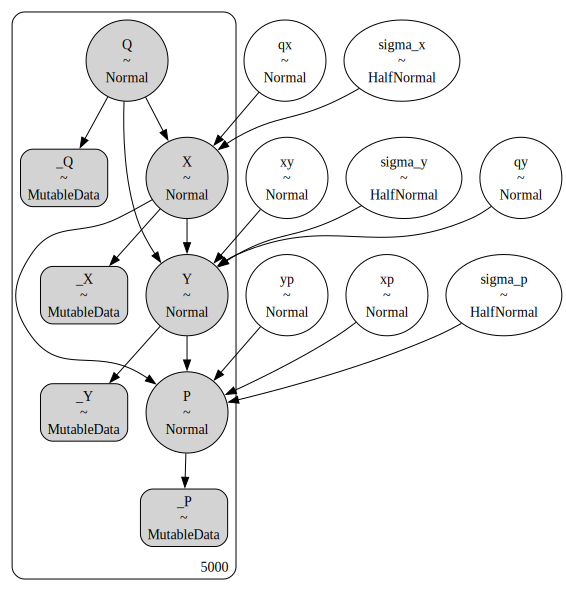

In [11]:
with pm.Model() as model:
    # data
    _Q = pm.MutableData("_Q", df["Q"])
    _X = pm.MutableData("_X", df["X"])
    _Y = pm.MutableData("_Y", df["Y"])
    _P = pm.MutableData("_P", df["P"])

    # priors on slopes
    # x ~ q
    qx = pm.Normal("qx")
    # y ~ x + q
    xy = pm.Normal("xy")
    qy = pm.Normal("qy")
    # p ~ x + y
    xp = pm.Normal("xp")
    yp = pm.Normal("yp")

    # priors on sd's
    sigma_x = pm.HalfNormal("sigma_x")
    sigma_y = pm.HalfNormal("sigma_y")
    sigma_p = pm.HalfNormal("sigma_p")
    
    # model
    Q = pm.Normal("Q", observed=_Q)
    X = pm.Normal("X", mu=qx*Q, sigma=sigma_x, observed=_X)
    Y = pm.Normal("Y", mu=xy*X + qy*Q, sigma=sigma_y, observed=_Y)
    P = pm.Normal("P", mu=xp*X + yp*Y, sigma=sigma_p, observed=_P)

pm.model_to_graphviz(model)

In [12]:
with model:
    idata = pm.sampling_jax.sample_numpyro_nuts(idata_kwargs={"log_likelihood": True})

Compiling...


Compilation time = 0:00:01.021747


Sampling...


  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

  0%|                                                                                  | 0/2000 [00:00<?, ?it/s]

Compiling.. :   0%|                                                                    | 0/2000 [00:00<?, ?it/s]

Running chain 1:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 2:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 0:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 3:   0%|                                                                 | 0/2000 [00:01<?, ?it/s]

Running chain 1:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1156.98it/s]

Running chain 2:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1157.67it/s]

Running chain 3:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1136.27it/s]

Running chain 0:  10%|█████▎                                               | 200/2000 [00:02<00:01, 1004.54it/s]

Running chain 1:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1491.81it/s]

Running chain 2:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1470.94it/s]

Running chain 3:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1405.87it/s]

Running chain 0:  20%|██████████▌                                          | 400/2000 [00:02<00:01, 1383.98it/s]

Running chain 1:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1668.35it/s]

Running chain 3:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1613.51it/s]

Running chain 0:  30%|███████████████▉                                     | 600/2000 [00:02<00:00, 1542.61it/s]

Running chain 2:  35%|██████████████████▌                                  | 700/2000 [00:02<00:00, 1770.01it/s]

Running chain 1:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1951.92it/s]

Running chain 3:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1943.08it/s]

Running chain 0:  45%|███████████████████████▊                             | 900/2000 [00:02<00:00, 1875.00it/s]

Running chain 2:  50%|██████████████████████████                          | 1000/2000 [00:02<00:00, 1991.09it/s]

Running chain 1:  55%|████████████████████████████▌                       | 1100/2000 [00:02<00:00, 1943.76it/s]

Running chain 3:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1999.12it/s]

Running chain 2:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 2105.61it/s]

Running chain 0:  60%|███████████████████████████████▏                    | 1200/2000 [00:02<00:00, 1977.98it/s]

Running chain 1:  65%|█████████████████████████████████▊                  | 1300/2000 [00:02<00:00, 1885.49it/s]

Running chain 2:  80%|█████████████████████████████████████████▌          | 1600/2000 [00:02<00:00, 2190.86it/s]

Running chain 3:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2016.05it/s]

Running chain 0:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 2058.72it/s]

Running chain 1:  75%|███████████████████████████████████████             | 1500/2000 [00:02<00:00, 1835.16it/s]

Running chain 2:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:02<00:00, 2248.30it/s]

Running chain 1:  85%|████████████████████████████████████████████▏       | 1700/2000 [00:02<00:00, 1881.34it/s]

Running chain 0:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2150.32it/s]

Running chain 3:  90%|██████████████████████████████████████████████▊     | 1800/2000 [00:02<00:00, 2027.10it/s]

Running chain 1:  95%|█████████████████████████████████████████████████▍  | 1900/2000 [00:03<00:00, 1872.92it/s]

Running chain 0: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 650.38it/s]


Running chain 1: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 650.56it/s]


Running chain 2: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 650.80it/s]


Running chain 3: 100%|█████████████████████████████████████████████████████| 2000/2000 [00:03<00:00, 651.05it/s]


Sampling time = 0:00:03.177698


Transforming variables...


Transformation time = 0:00:00.067035


Computing Log Likelihood...


Log Likelihood time = 0:00:00.723991


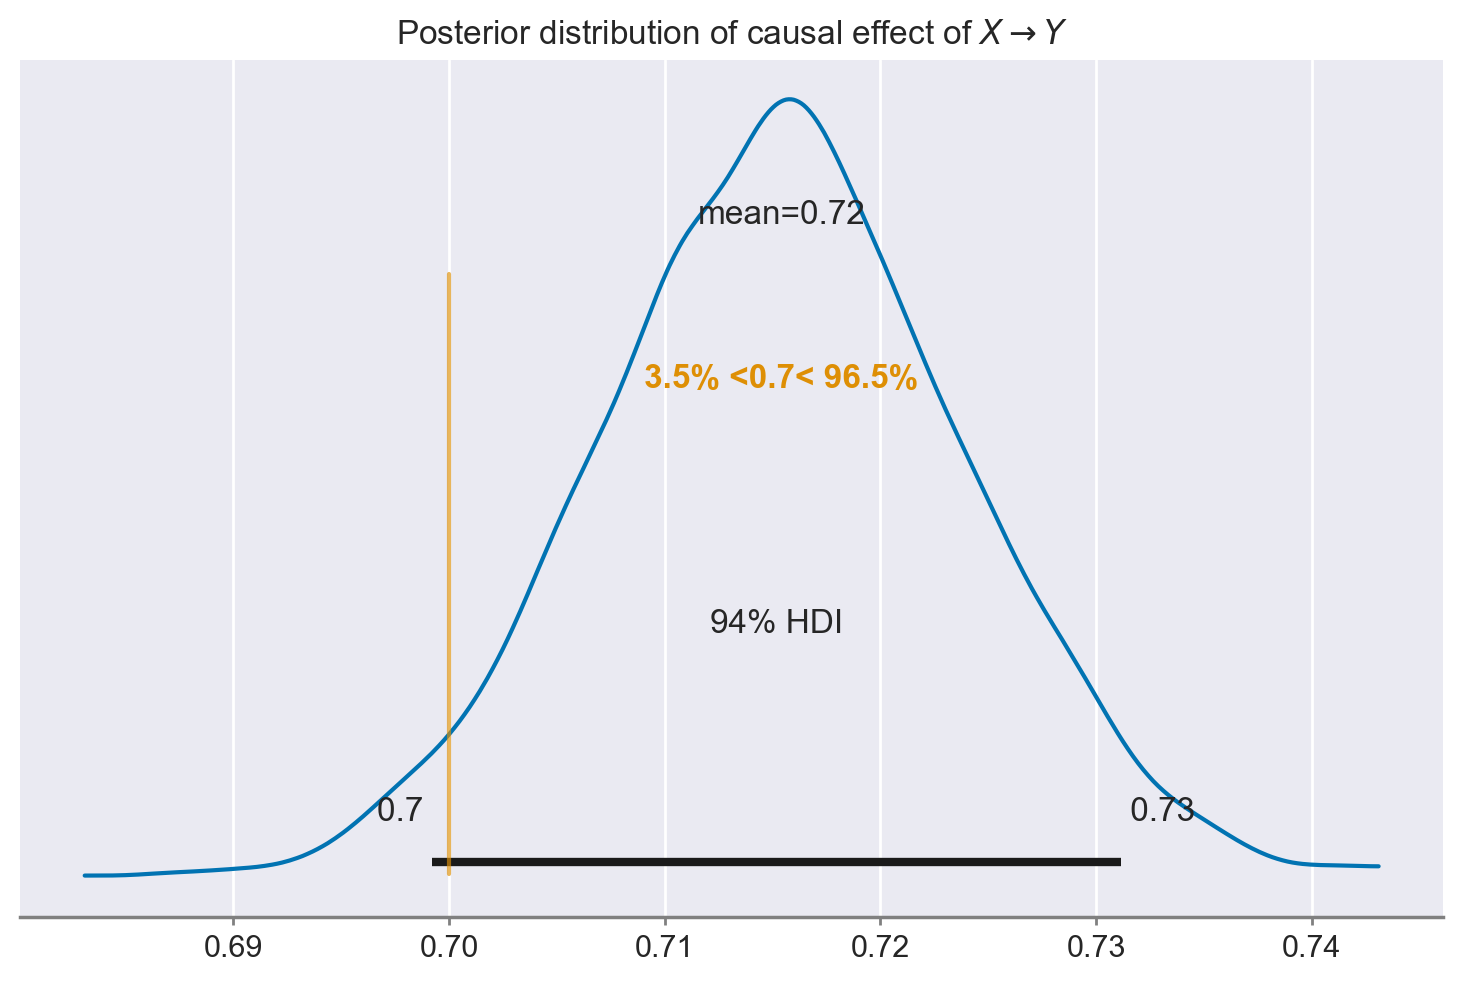

In [13]:
ax = az.plot_posterior(idata, var_names="xy", ref_val=0.7)
ax.set_title(r"Posterior distribution of causal effect of $X \rightarrow Y$");

In [14]:
%load_ext watermark
%watermark -n -u -v -iv -w -p pytensor

Last updated: Thu Jan 25 2024

Python implementation: CPython
Python version       : 3.11.7
IPython version      : 8.19.0

pytensor: 2.18.4

arviz     : 0.17.0
matplotlib: 3.8.2
pymc      : 5.10.3
bambi     : 0.13.0
scipy     : 1.11.4
numpy     : 1.26.2
seaborn   : 0.13.0
networkx  : 3.2.1
pandas    : 2.1.4

Watermark: 2.4.3

